In [1]:
%matplotlib notebook
from fractal import Fractal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def button_press(event):
    coords.append((event.xdata, event.ydata))

In [3]:
def button_release(event,img):
    coords.append((event.xdata, event.ydata))
    xmin = np.min((coords[-2][0],coords[-1][0]))
    xmax = np.max((coords[-2][0],coords[-1][0]))
    ymin = np.min((coords[-2][1],coords[-1][1]))
    ymax = np.max((coords[-2][1],coords[-1][1]))

    [x1,y1,x2,y2] = frac.bbox

    nx = frac.nx
    ny = frac.ny
    xmin = x1+xmin*(x2-x1)/nx
    xmax = x1+xmax*(x2-x1)/nx
    ymin = y1+ymin*(y2-y1)/ny
    ymax = y1+ymax*(y2-y1)/ny

    frac.bbox = [xmin,ymin,xmax,ymax]

    frac.compute()
    C = frac.get_color_array()
    
    dpi = 100
    img.set_data(C)
    plt.draw()

To select a new zoom rectangle (p1, p2): move mouse to point p1 in figure, click and hold, drag mouse to second point p2, release button. The fractal within the rectangle should be calculated automatically 

computing 256x256 pixel on 8 proc's ... runtime =  1.88 [s]


<IPython.core.display.Javascript object>


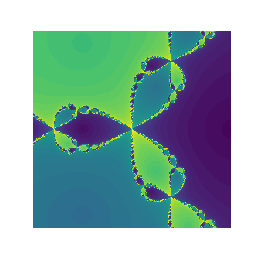

In [4]:
global frac
frac = Fractal()
frac.nx = 256
frac.ny = 256
frac.nproc = 8
frac.compute()
C = frac.get_color_array()
dpi = 100
fig=plt.figure(figsize=(frac.nx/dpi, frac.ny/dpi), dpi=dpi, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
img = plt.imshow(C,interpolation='nearest')
plt.axis('off')
global coords
coords = []

cid1 = fig.canvas.mpl_connect('button_press_event', button_press)
cid2 = fig.canvas.mpl_connect('button_release_event', lambda event: button_release(event,img))

plt.show()